- api 설정 

In [14]:
%pwd

'/Users/jh/Documents/dss/project/sai'

In [15]:
!ls | grep json

project-sai-323408-4cc25ead6e57.json


In [16]:
key_files = !ls | grep json
key_file = key_files[0]

In [17]:
key_file

'project-sai-323408-4cc25ead6e57.json'

In [18]:
path = !pwd
key_path = f"{path[0]}/{key_files[0]}"
key_path

'/Users/jh/Documents/dss/project/sai/project-sai-323408-4cc25ead6e57.json'

- 패키지 import 

In [19]:
#!pip install google-cloud google-cloud-vision

from google.cloud import vision
from PIL import Image as pil 
import os 

In [20]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_path

In [21]:
#객체 생성
client = vision.ImageAnnotatorClient()

- 이미지 체크
- 이미지 객체 생성 

In [22]:
!ls imgs

test1.jpeg test2.jpeg test3.jpeg


In [23]:
img_path1 = "imgs/test1.jpeg" 
img_path2 = "imgs/test2.jpeg" 
img_path3 = "imgs/test3.jpeg"

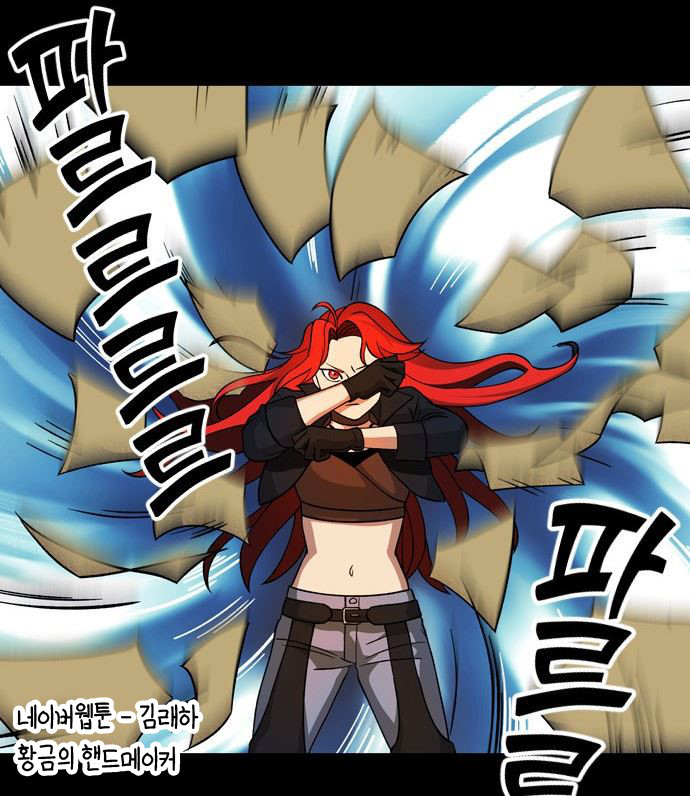

In [56]:
pil.open(img_path3)

In [49]:
import io

In [57]:
with io.open(img_path3, "rb") as image_file :
    content = image_file.read()
image = vision.Image(content=content)

- 요청해보기 

In [58]:
response = client.document_text_detection(
    image = image, 
    image_context = {"language_hints" : ["ko"]})

In [59]:
for page in response.full_text_annotation.pages:
    for block in page.blocks :
        print("\n Block confidence : {} \n".format(block.confidence))
        
        for paragraph in block.paragraphs:
            print("Paragraph confidence : {}".format(paragraph.confidence))
            
            for word in paragraph.words:
                word_text = "".join([
                    symbol.text for symbol in word.symbols
                ])
                
                print("Word text: {} confidence : {}".format
                     (word_text, word.confidence))
                
                for symbol in word.symbols:
                    print("\t symbol : {} confidence : {}".format
                         (symbol.text, symbol.confidence))


 Block confidence : 0.36000001430511475 

Paragraph confidence : 0.36000001430511475
Word text: 페 confidence : 0.36000001430511475
	 symbol : 페 confidence : 0.36000001430511475

 Block confidence : 0.4099999964237213 

Paragraph confidence : 0.4099999964237213
Word text: 르 confidence : 0.09000000357627869
	 symbol : 르 confidence : 0.09000000357627869
Word text: 르르 confidence : 0.5799999833106995
	 symbol : 르 confidence : 0.5299999713897705
	 symbol : 르 confidence : 0.6299999952316284

 Block confidence : 0.3499999940395355 

Paragraph confidence : 0.3499999940395355
Word text: Gimler confidence : 0.3499999940395355
	 symbol : G confidence : 0.9900000095367432
	 symbol : i confidence : 0.10999999940395355
	 symbol : m confidence : 0.12999999523162842
	 symbol : l confidence : 0.7300000190734863
	 symbol : e confidence : 0.03999999910593033
	 symbol : r confidence : 0.12999999523162842

 Block confidence : 0.8700000047683716 

Paragraph confidence : 0.8700000047683716
Word text: 네이버 con